## Libraries

#### The first part of the code performs ad optimization by random selection. The second part of the code uses the Upper Confidence Interval algorithm to make smarter choices and try to maximize the click-through rate of ads. It shows the distribution and total reward of ads selected at the end of both algorithms.

#### Required libraries are being loaded.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
import random

## Reading data

In [11]:
data = pd.DataFrame(pd.read_csv("C:\\Users\\Arif Furkan\\OneDrive\\Belgeler\\Python_kullanirken\\Ads_CTR_Optimisation.csv"))
print(data)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


## Random Selection

#### In the loop, a random ad is selected with the random.randrange(d) function and this ad is added to the chosen list. The reward (click) of the selected ad is added to the total variable. Finally, the total reward and histogram are shown.

Total Award:
1249


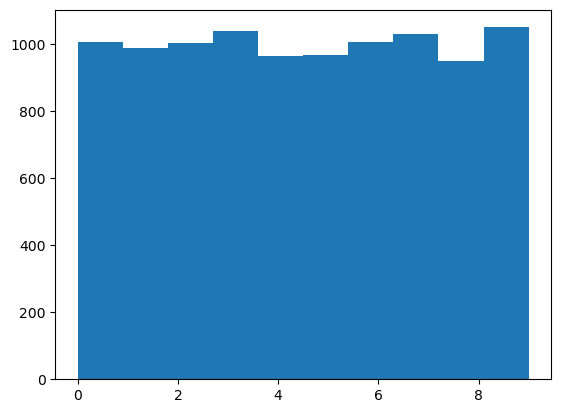

In [26]:
N = 10000
d = 10
total = 0
chosen = []
for n in range(0,N):
    ad = random.randrange(d)
    chosen.append(ad)
    award = data.values[n,ad]
    total = total + award
print('Total Award:') 
print(total)

plt.hist(chosen)
plt.show()

## UCB

#### At first, each ad is assigned ucb = N*10 until it is selected at least once. The ad with the maximum UCB value is selected and added to the chosen list. The number of clicks and rewards for the selected ad are updated. Finally, the total reward and histogram are shown.

In [35]:
N=10000
d=10
awards = [0] * d
clicks=[0] * d
total = 0 
chosen = []
for n in range(1,N):
    ad = 0 
    max_ucb = 0
    for i in range(0,d):
        if(clicks[i] > 0):
            ortalama = awards[i] / clicks[i]
            delta = math.sqrt(3/2* math.log(n)/clicks[i])
            ucb = ortalama + delta
        else:
            ucb = N*10
        if max_ucb < ucb: 
            max_ucb = ucb
            ad = i          
    chosen.append(ad)
    clicks[ad] = clicks[ad]+ 1
    award = data.values[n,ad] 
    awards[ad] = awards[ad]+ award
    total = total + award
print('Total Award:')   
print(total)

Total Award:
2231


## UCB-2

Total Award:
2231


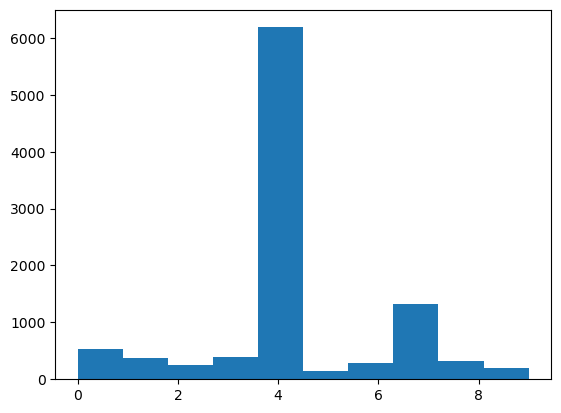

In [42]:
import math
N = 10000 
d = 10  
#Ri(n)
awards = [0] * d 
#Ni(n)
clicks = [0] * d 
total = 0 
chosen = []
for n in range(1,N):
    ad = 0 
    max_ucb = 0
    for i in range(0,d):
        if(clicks[i] > 0):
            ortalama = awards[i] / clicks[i]
            delta = math.sqrt(3/2* math.log(n)/clicks[i])
            ucb = ortalama + delta
        else:
            ucb = N*10
        if max_ucb < ucb: 
            max_ucb = ucb
            ad = i          
    chosen.append(ad)
    clicks[ad] = clicks[ad]+ 1
    award = data.values[n,ad] 
    awards[ad] = awards[ad]+ award
    total = total + award
print('Total Award:')   
print(total)

plt.hist(chosen)
plt.show()

## General Operation of the Code